In [1]:
import pandas as pd
import numpy as np

In [2]:
import sklearn

In [42]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
y_train=df['SalePrice']
# df.drop(['SalePrice'],axis=1, inplace=True)
nTrain=df.shape[0]
nTest=test.shape[0]
dataset=pd.concat((df,test)).reset_index(drop=True)
print(dataset.shape)
dataset.head()
df=dataset


(2919, 81)


In [43]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [44]:
df.isnull().sum()[0:60]


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
Alley           2721
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [45]:
df.isnull().sum()[60:]


GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual        159
GarageCond        159
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           2909
Fence            2348
MiscFeature      2814
MiscVal             0
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
dtype: int64

# handeling null values

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\karti\AppData\Local\Temp\ipykernel_18348\3644403416.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['LotFrontage'].sort_values()


<Axes: xlabel='LotConfig', ylabel='LotFrontage'>

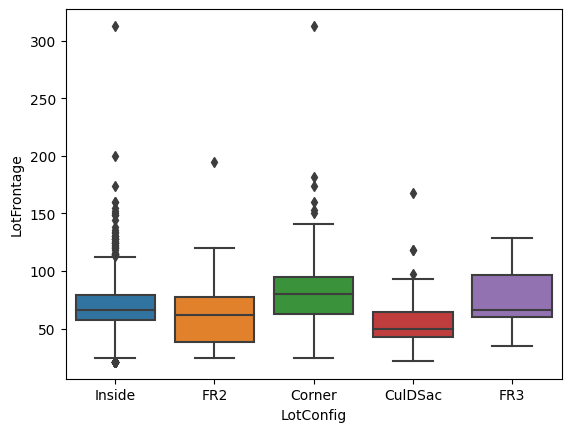

In [47]:
df.corr()['LotFrontage'].sort_values()
sns.boxplot(x='LotConfig', y='LotFrontage', data=df)

In [48]:
df1=df['LotFrontage'].fillna(df.groupby(['LotShape'])['LotFrontage'].transform('mean'), inplace=True)

Alleys

In [49]:
df['Alley'].value_counts()
df.Alley.fillna('none', inplace=True)

Basement

In [50]:
df['BsmtQual'].value_counts()
df.BsmtQual.fillna('none', inplace=True)



In [51]:
df['BsmtCond'].value_counts()
df.BsmtCond.fillna('none', inplace=True)


In [52]:
df['BsmtExposure'].value_counts()
df.BsmtExposure.fillna('none', inplace=True)


In [53]:
df['BsmtFinType1'].value_counts()
df.BsmtFinType1.fillna('none', inplace=True)

In [54]:
df['BsmtFinType2'].value_counts()
df.BsmtFinType2.fillna('none', inplace=True)

In [55]:
df.Electrical.fillna(df.Electrical.mode()[0], inplace=True)

In [56]:
df.MSZoning.fillna(df.MSZoning.mode()[0], inplace=True)


In [57]:
df.Exterior1st.fillna(df.Exterior1st.mode()[0], inplace=True)
df.Exterior2nd.fillna(df.Exterior2nd.mode()[0], inplace=True)


In [58]:
df.SaleType.fillna(df.SaleType.mode()[0], inplace=True)
df.Functional.fillna(df.Functional.mode()[0], inplace=True)
df.KitchenQual.fillna(df.KitchenQual.mode()[0], inplace=True)



In [59]:
df['FireplaceQu'].value_counts()
df.FireplaceQu.fillna('none', inplace=True)

Garage

In [60]:
df.GarageFinish.fillna('none', inplace=True)
df.GarageYrBlt.fillna(0, inplace=True)
df.GarageType.fillna('none', inplace=True)
df.GarageCond.fillna('none', inplace=True)
df.GarageQual.fillna('none', inplace=True)



In [61]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col].fillna(0, inplace=True)

In [62]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

In [63]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

<Axes: >

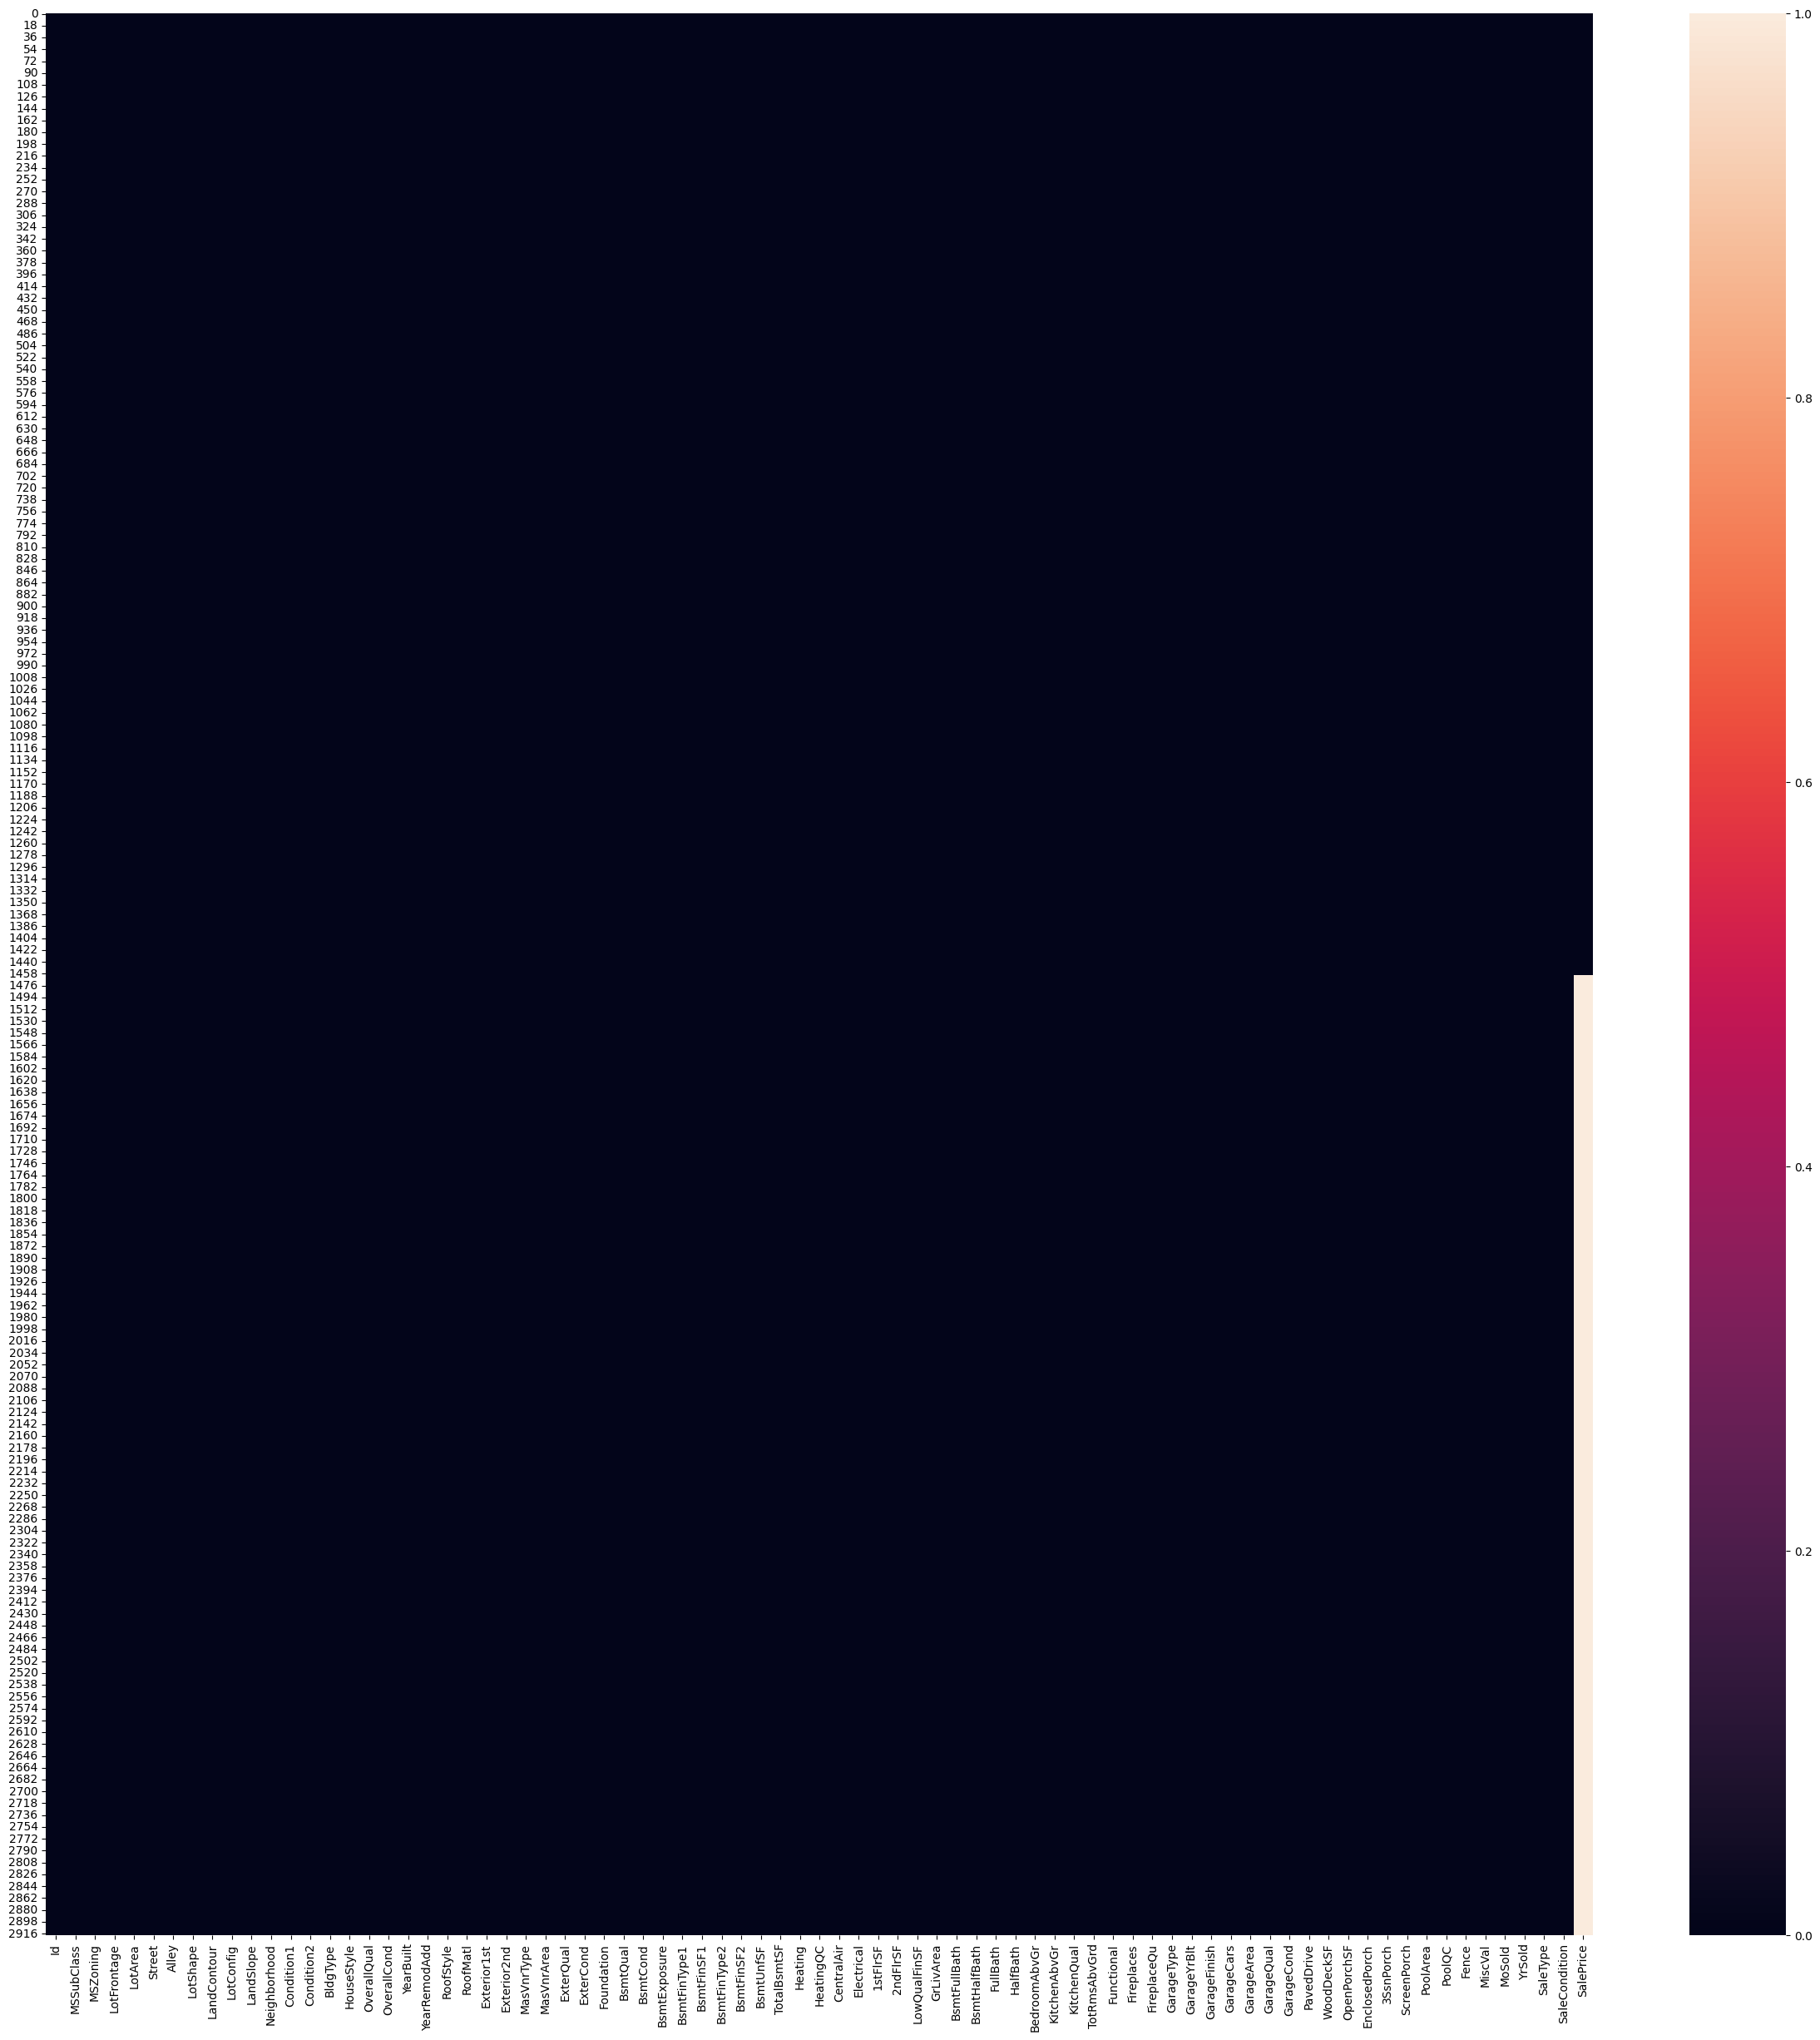

In [91]:
plt.figure(figsize=(30,30))
sns.heatmap(df.isnull())

In [65]:
df.Fence.fillna('none', inplace=True)
df.PoolQC.fillna('none', inplace=True)


In [66]:
df['MiscFeature'].value_counts()
df.drop(['MiscFeature'], axis=1,inplace=True)


In [90]:
df['Utilities'].value_counts()
df.drop(['Utilities'], axis=1,inplace=True)

In [68]:
df.MasVnrType.fillna('none', inplace=True)
df.MasVnrArea.fillna(0,inplace=True)

<Axes: >

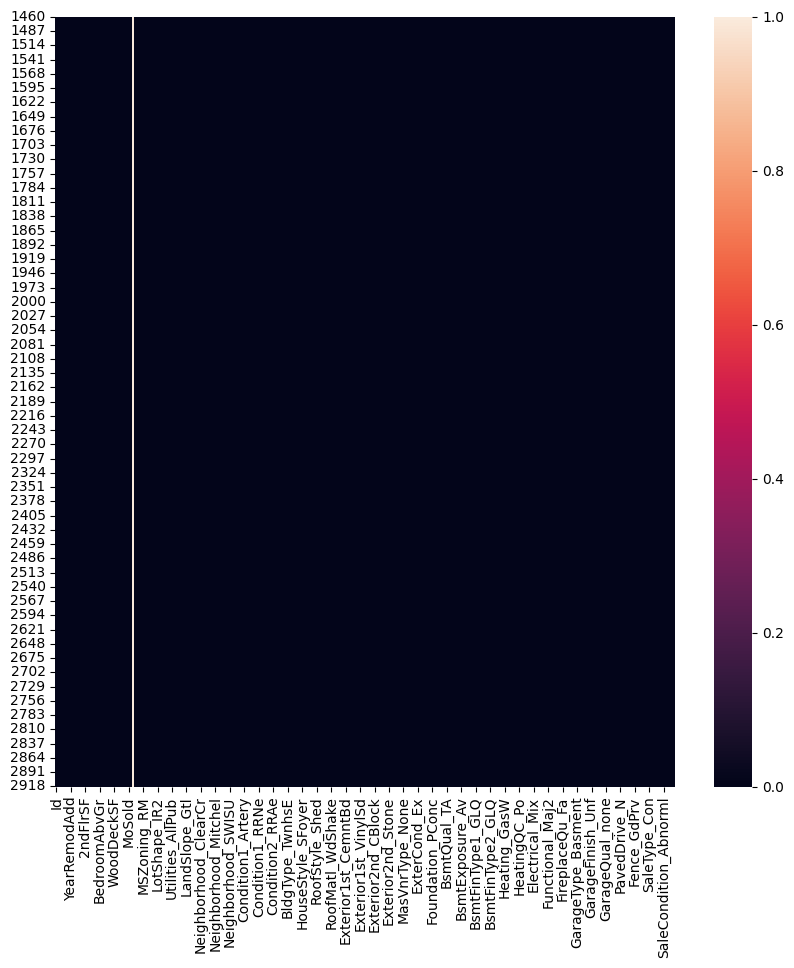

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(x_test.isnull())


In [70]:
x_train=df[:nTrain]
x_test=df[nTrain:]

In [92]:
x_train.drop(['SalePrice'],axis=1, inplace=True)

C:\Users\karti\AppData\Local\Temp\ipykernel_18348\3988175680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(['SalePrice'],axis=1, inplace=True)


In [93]:
firstCheckpointDataSet=df.copy()

In [72]:
objectDf = df.select_dtypes(include='object')
objectDf.head()
objectColumn=list(df.select_dtypes(include='object'))
print(objectDf.shape)
print(objectColumn)

(2919, 42)
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition']


In [73]:
numdf = df.select_dtypes(include=('int64','float64'))
numColums=list(df.select_dtypes(include=('int64','float64')))
print(numColums)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [74]:
df['LandSlope'].value_counts()

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

In [75]:
# sns.boxplot(x='LandSlope', y='SalePrice', data=df)
# df.head()

In [76]:
df["SalePrice"] = np.log1p(df["SalePrice"])


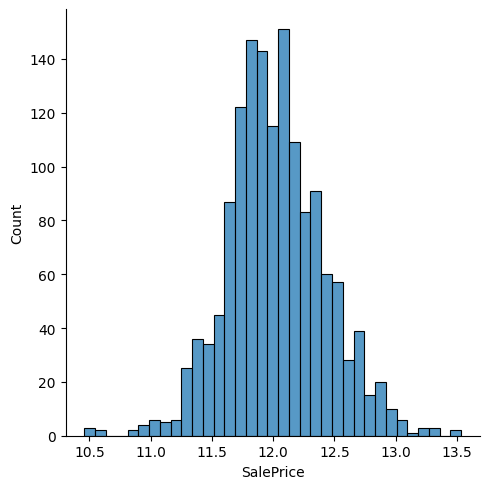

In [99]:
sns.displot(df['SalePrice'])

In [97]:
from scipy import stats
from scipy.stats import norm, skew

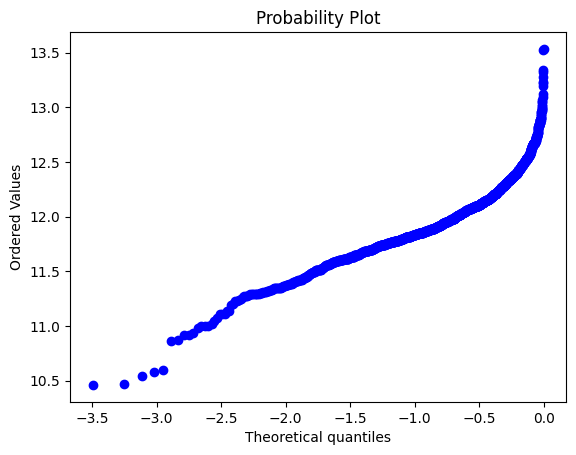

In [98]:
res = stats.probplot(x_train['SalePrice'], plot=plt)
plt.show()

Fixing skew features by boxcox

In [80]:
dummy=pd.get_dummies(df)

In [81]:
x_train=dummy[:nTrain]
x_test=dummy[nTrain:]

In [82]:
from sklearn import ensemble

GBoost = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [83]:
# GBoost.fit(x_train,y_train)

In [84]:
# GBoost.score(x_train,y_train)

In [85]:
# print(x_train.shape)
# print(x_test.shape)

In [86]:
# y_predict=GBoost.predict(x_test)

In [87]:
# y_true=pd.read_csv('sample_submission.csv')

In [88]:
# output = pd.DataFrame({'Id': y_true.Id, 'SalePrice': y_predict})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")